# Visualizing Activity Patterns

This notebook is a playground to visualize all kinds of relationships that exist between the measurable quantities of the activities, such as distance, elapsed time or elevation gain. Some plotting features are already provided, to be used as an inspiration.

I should note that the plots will look different if you run the script yourself, that's because I uploaded only a small part of my activties to GitHub.

In [1]:
#Import the necessary libraries and classes
import pandas as pd
from format_data import format_df
from plot_helpers import plotting

In [2]:
#Import table which has all the activities
activities = pd.read_csv('data/activities.csv')
activities.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,...,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow
0,638693618,"Jul 12, 2016, 5:13:58 PM",Lauf am Abend,Run,Kurze Runde durch trudering,2271,7.83,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,668551054,"Aug 8, 2016, 5:16:42 AM",Lauf am Morgen,Run,NaN,3197,8.03,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,669642834,"Aug 9, 2016, 5:20:59 AM",Lauf am Morgen,Run,NaN,3453,4.47,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,780840359,"Nov 20, 2016, 12:11:48 PM",Course à pied de l'après-midi,Run,NaN,8582,20.39,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,784102286,"Nov 24, 2016, 7:33:51 AM",Course à pied matinale,Run,NaN,7138,18.00,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We notice this table has several problems:
- It has way more columns than we need, some of which are even consistently null
- the column names are long and *might* be in a different language
- some columns don't have the proper format
- the `Activity Date` column refers to UTC. We cannot fix that immediately because we'd need latitude/longitude to determine te correct timezone, which isn't stored in this table.

A helper function will address these problems; it will also remove activties that aren't very interesting for plotting. In my case, only running, cycling and hiking were recorded often enough to make their visualization interesting, and `prepare_activities` also selects those, in addition to the operations described above.

In [3]:
#format activties
f = format_df()
core_activities = f.prepare_activities(activities)
core_activities.head(36)

,date,type,distance,moving_time,elapsed_time,max_speed,elevation,max_incline,year,avg_speed,km_effort,avg_incline
id,,,,,,,,,,,,
638693618,2016-07-12 17:13:58,running,7.83,00:37:09,00:37:51,4.9,10.6,7.3,2016,3.5,7.94,0.1
668551054,2016-08-08 05:16:42,running,8.03,00:49:35,00:53:17,6.2,306.4,29.1,2016,2.7,11.09,3.8
669642834,2016-08-09 05:20:59,running,4.47,00:52:13,00:57:33,5.8,221.8,31.9,2016,1.4,6.69,5.0
780840359,2016-11-20 12:11:48,running,20.39,02:15:00,02:23:02,8.4,654.2,49.6,2016,2.5,26.93,3.2
784102286,2016-11-24 07:33:51,running,18.00,01:52:37,01:58:58,6.6,666.0,49.7,2016,2.7,24.66,3.7
788804507,2016-11-29 11:23:24,running,6.39,00:42:23,00:45:30,5.6,390.9,49.4,2016,2.5,10.30,6.1
790506646,2016-12-01 10:48:35,running,11.07,01:09:55,01:13:28,11.7,570.3,49.4,2016,2.6,16.77,5.2
793443656,2016-12-04 11:22:44,running,25.90,03:22:16,03:57:45,10.0,1624.7,50.0,2016,2.1,42.15,6.3
794999775,2016-12-06 10:59:34,running,10.54,01:06:15,01:08:05,7.2,528.1,49.3,2016,2.7,15.82,5.0


Now let's explore the dataset a bit! For example, we can plot histograms for any quantity we're interested in.

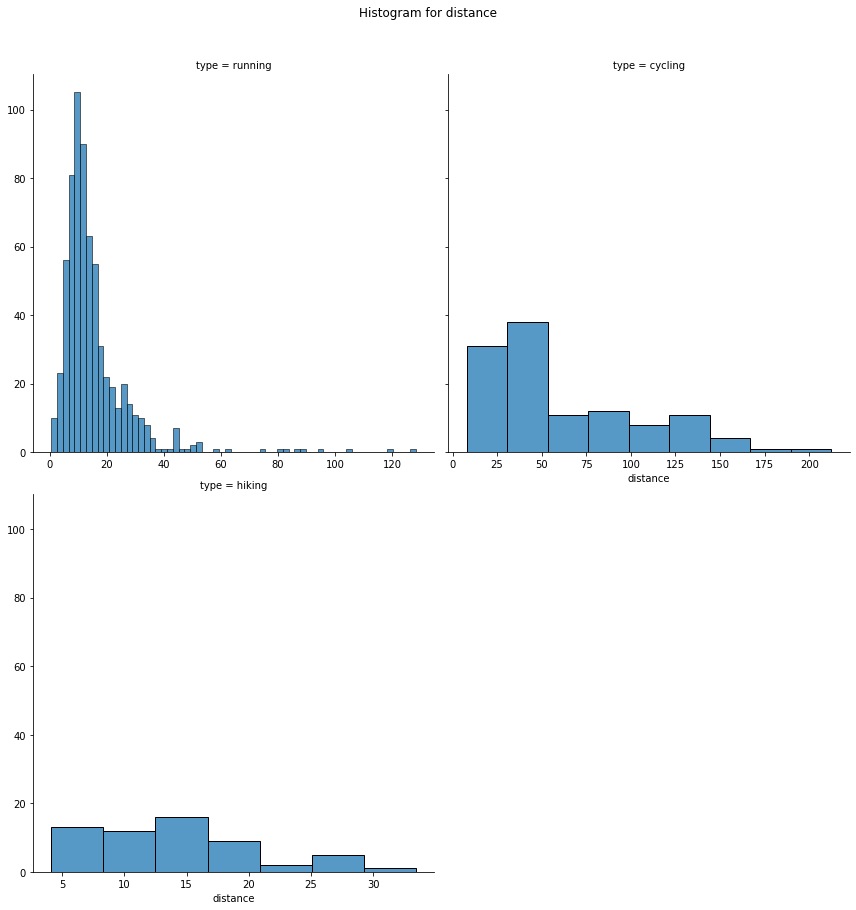

In [4]:
plotting.plot_histograms(core_activities, 'distance')

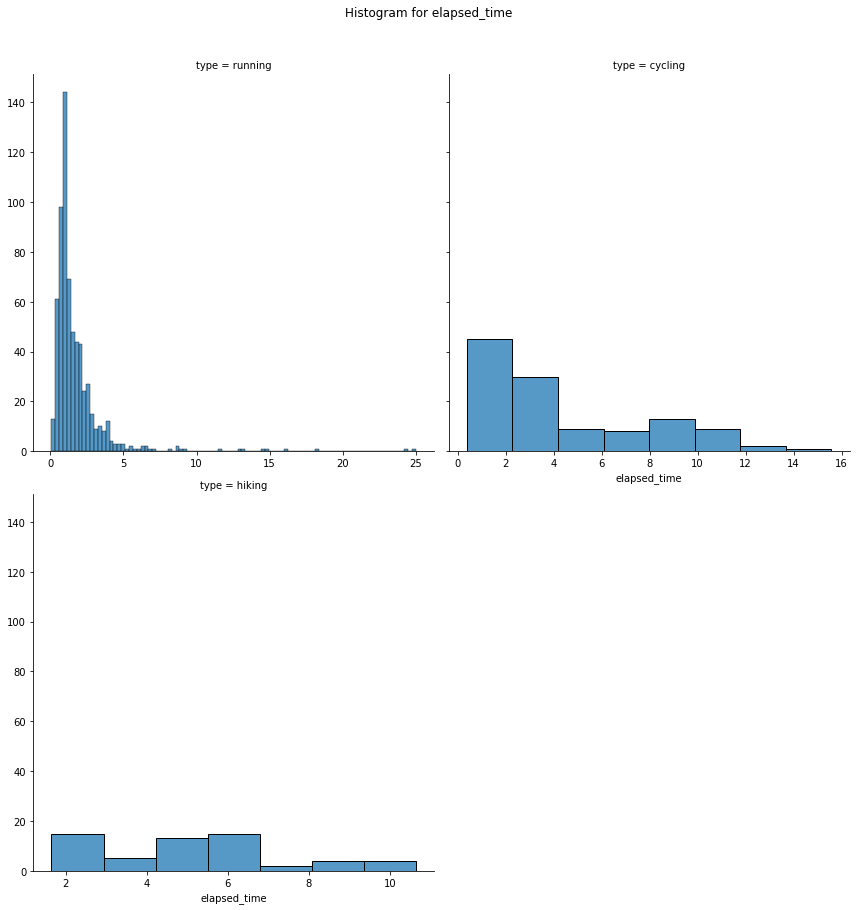

In [5]:
plotting.plot_histograms(core_activities, 'elapsed_time')

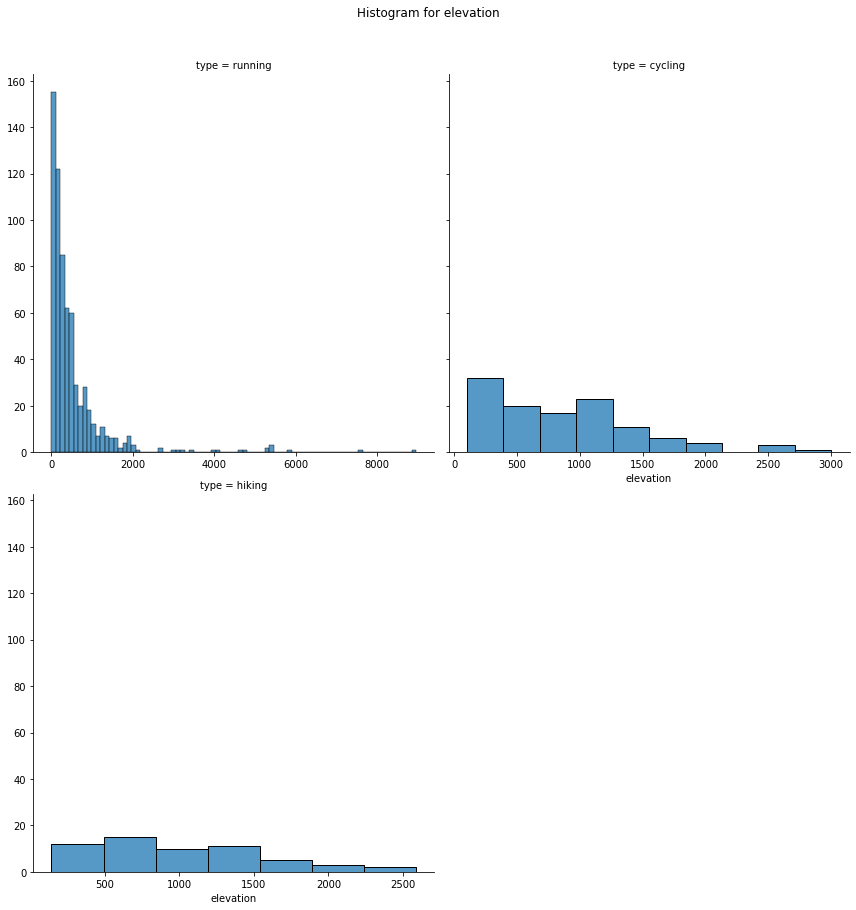

In [6]:
plotting.plot_histograms(core_activities, 'elevation')

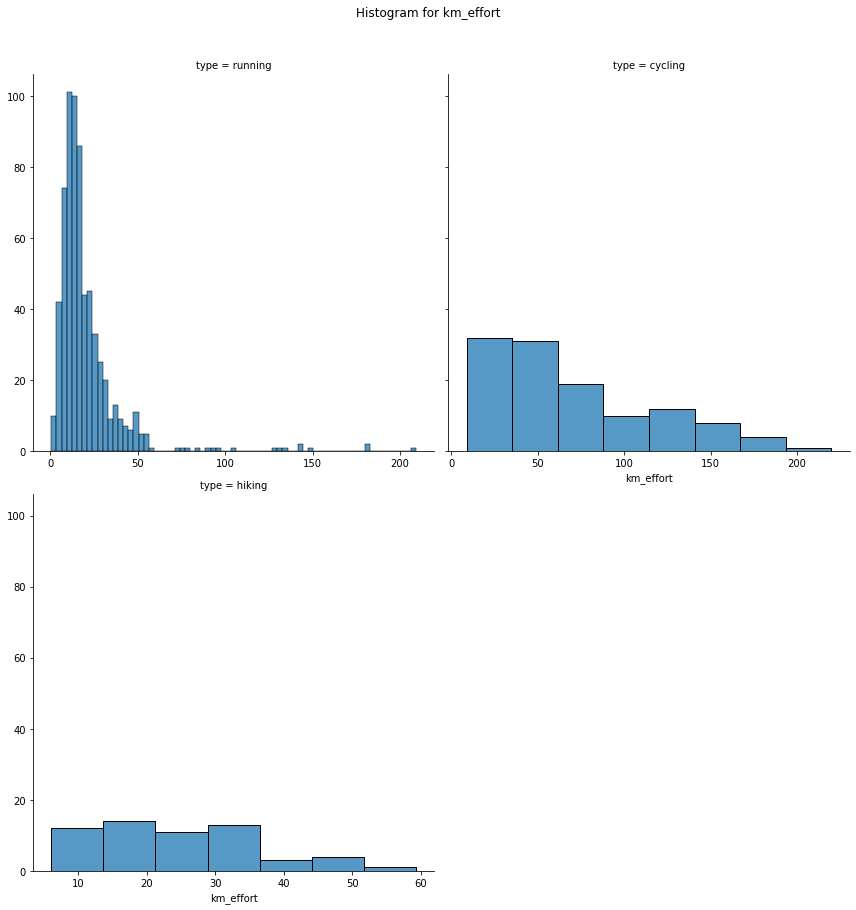

In [7]:
plotting.plot_histograms(core_activities, 'km_effort')

We can also do simple scatterplots to see if there's a relationship between different quantities:

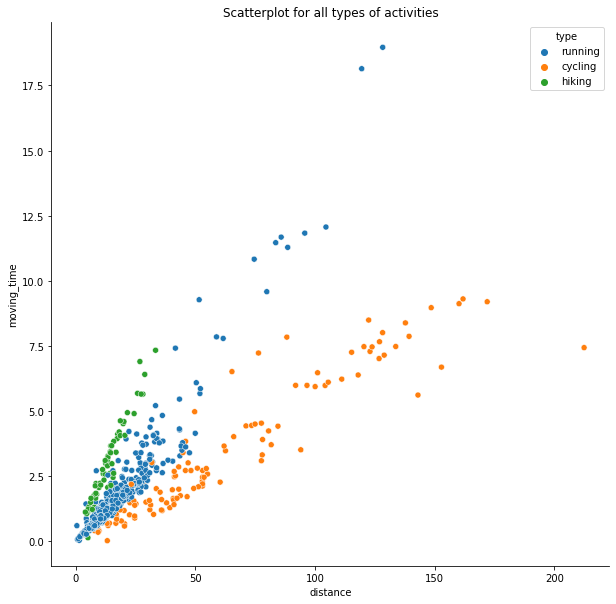

In [8]:
plotting.plot_scatter(core_activities, 'distance', 'moving_time')

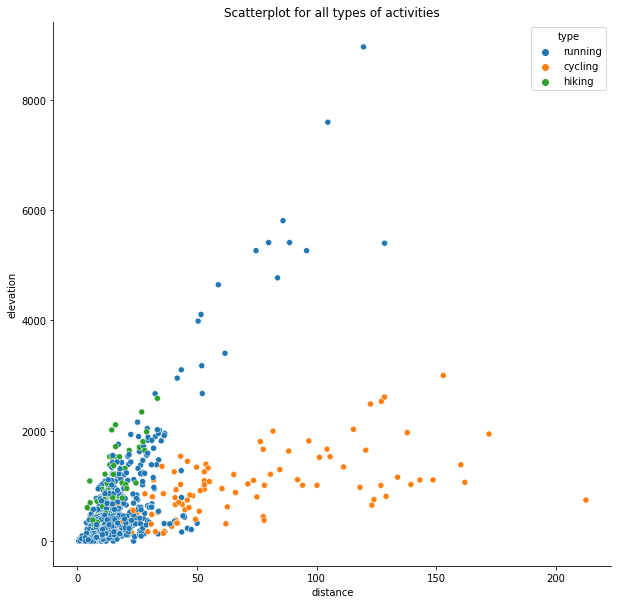

In [9]:
plotting.plot_scatter(core_activities, 'distance', 'elevation')

We can even try to do a bit of regression analysis. For example, we may suspect that there's a linear relation between distance and elpased time. We can first show all activties in just one graph:

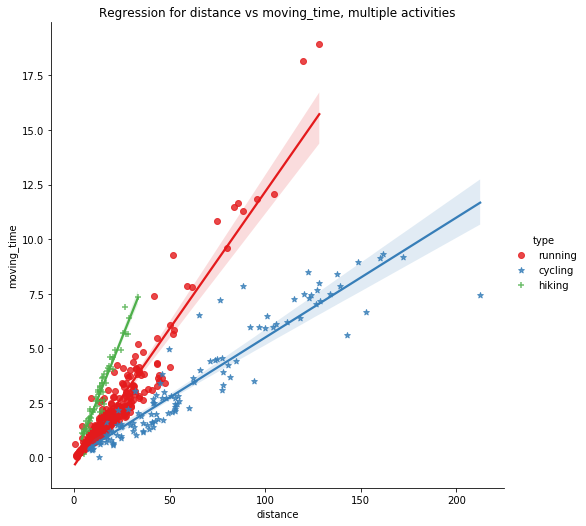

In [10]:
plotting.plot_multi_reg(core_activities, "distance", "moving_time")

But these things are maybe easier to see if we just look at one activity at a time.

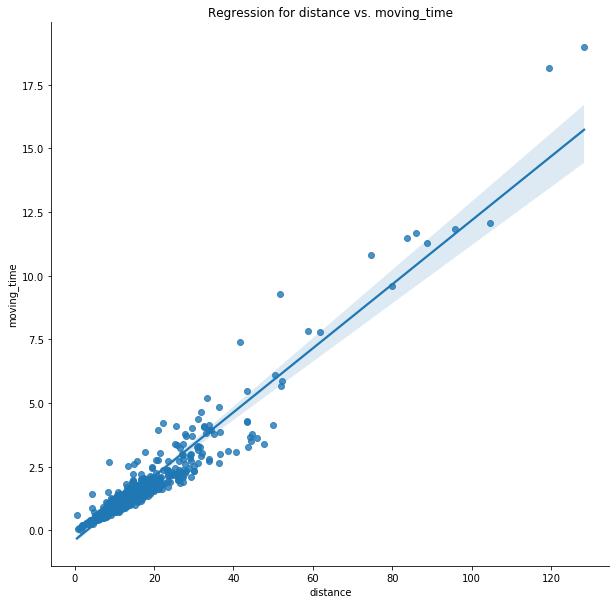

In [11]:
plotting.plot_regression(core_activities, 'running', 'distance', 'moving_time')

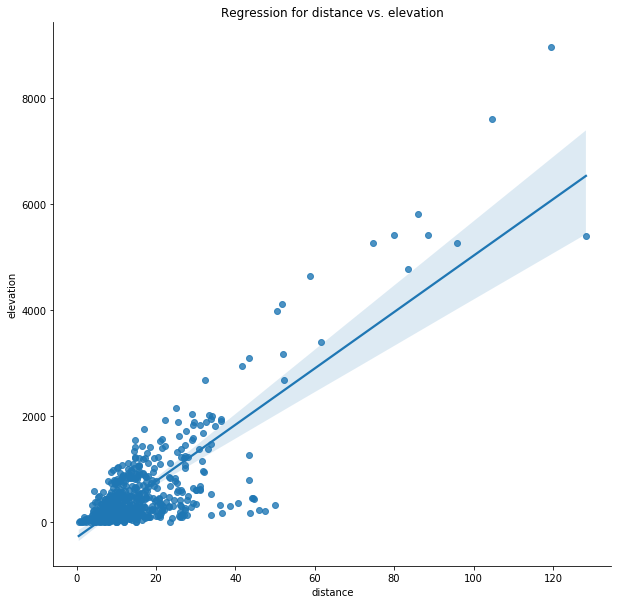

In [12]:
plotting.plot_regression(core_activities, 'running', 'distance', 'elevation')

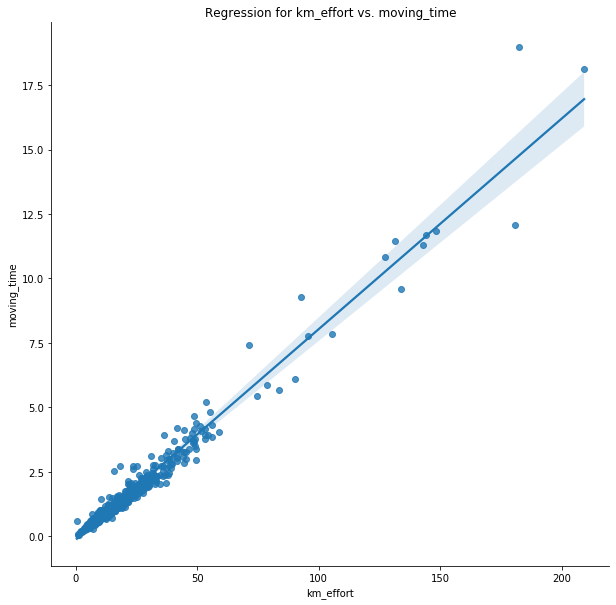

In [13]:
plotting.plot_regression(core_activities, 'running', 'km_effort', 'moving_time')

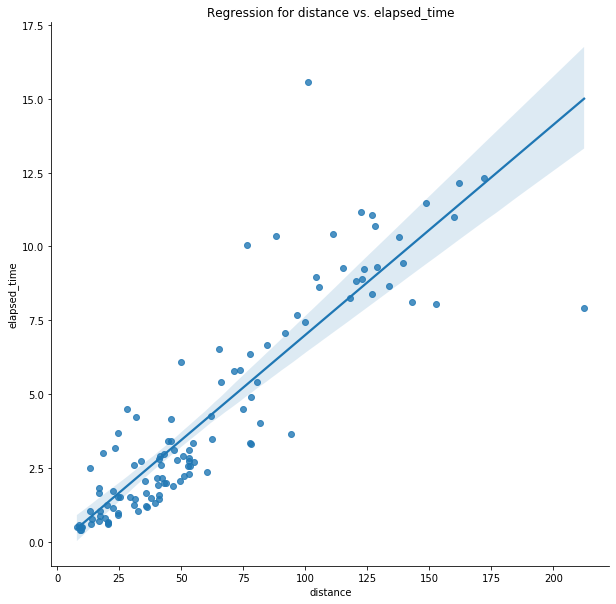

In [14]:
plotting.plot_regression(core_activities, 'cycling', 'distance', 'elapsed_time')

Before moving on, let's save the data frame we create into a csv for future uses.

In [15]:
core_activities.to_csv('data/formatted_activities.csv')

## Aggregate activities

There is on last thing I propose to look at (many more are possible, of course), and that's aggregated the stats by year or type of activity. The first step will be to create the relevant dataframes:

In [16]:
agg_df_year = format_df.create_aggregate_copy(core_activities, group = 'year', saveToFile = True)
agg_df_type = format_df.create_aggregate_copy(core_activities, group = 'type', saveToFile = True)

Then, we can plot a couple of cool things, for example, the distance covered by each activity:

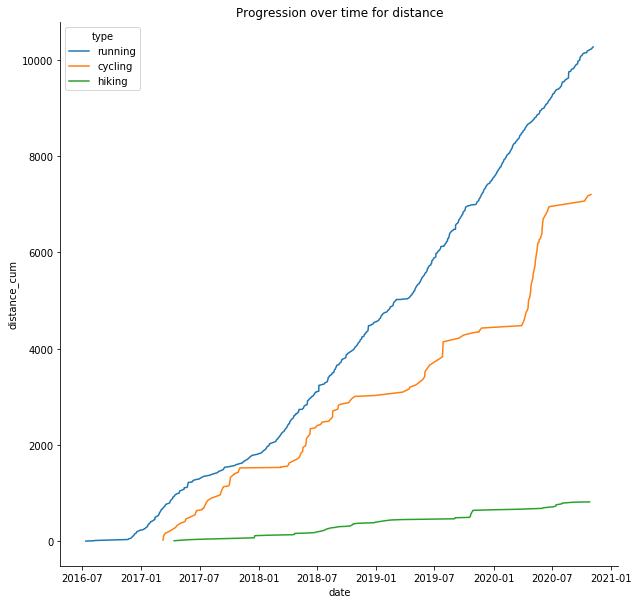

In [17]:
plotting.plot_aggregate_by_type(agg_df_type, category = 'distance')

Or we could look at the total time spent doing sports per year:

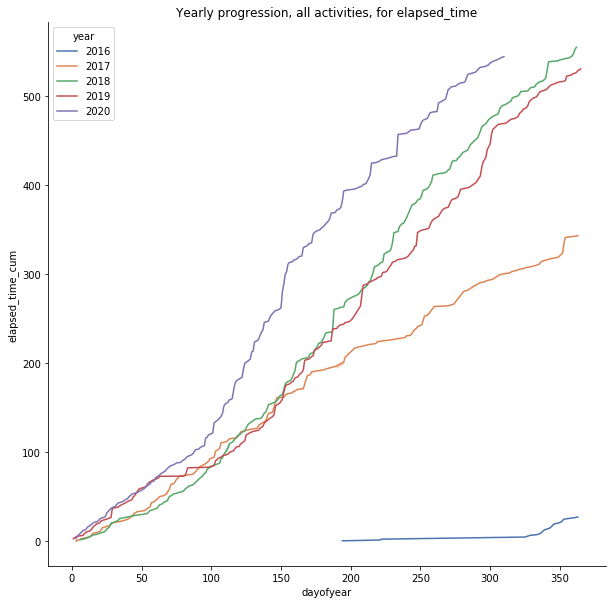

In [18]:
plotting.plot_aggregate_by_year(agg_df_year, category = 'elapsed_time')

Same for the kilometer-effort:

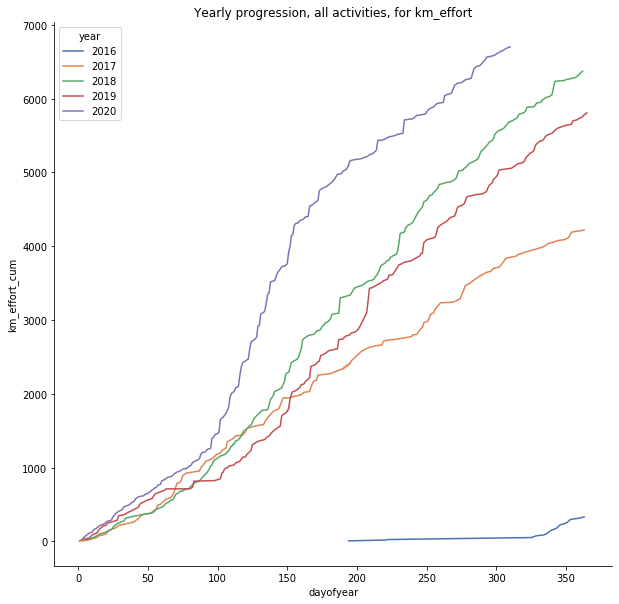

In [19]:
plotting.plot_aggregate_by_year(agg_df_year, category = 'km_effort')

We'll leave it here for now; the next step is to combine these results with the data pulled from the individual activties (the gpx files, that is). But this will happen in a separate notebook.